In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [11]:

df = pd.read_csv("results.csv")
agg = (
    df
    .groupby(["container", "operation", "size"], as_index=False)
    .time_us
    .mean()
)
agg

,container,operation,size,time_us
0,MyArray1000,at,1000,2.0
1,MyArray1000,compare_eq,1000,1.0
2,MyArray1000,compare_three_way,1000,1.0
3,MyArray1000,copy_ctor,1000,1.6
4,MyArray1000,ctor_default,1000,1.4
...,...,...,...,...
67,std::vector,push_back,100000,661.6
68,std::vector,resize,10000,9.4
69,std::vector,resize,100000,126.4
70,std::vector,swap,10000,0.0


1000
5000
10000
100000


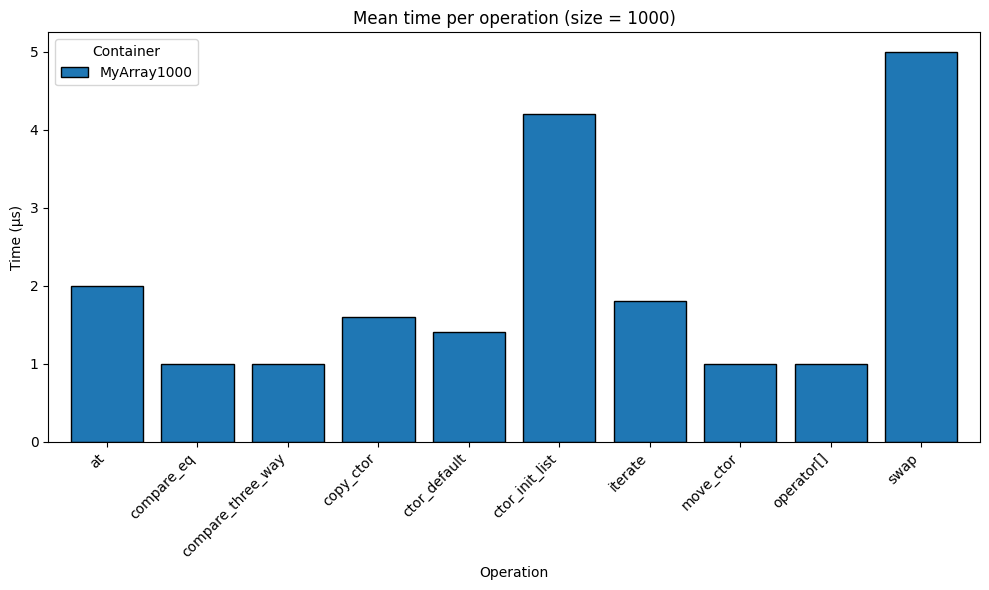

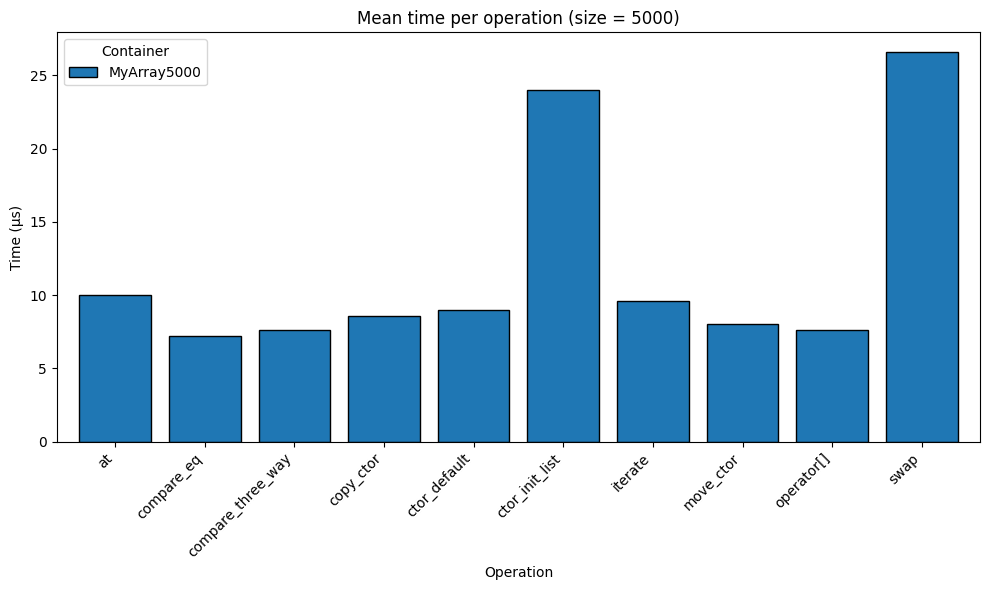

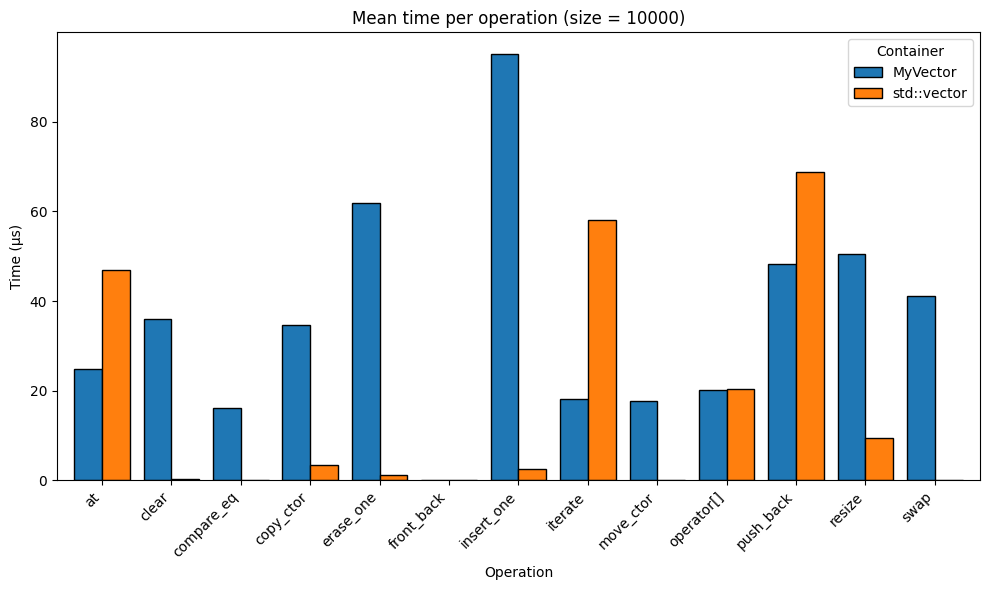

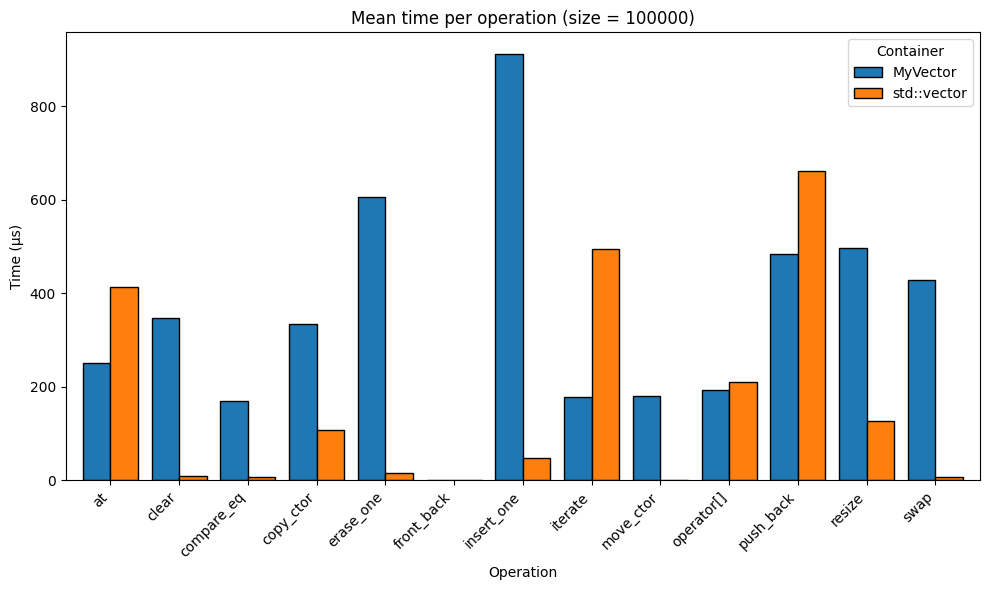

In [14]:

out_dir = "plots"
os.makedirs(out_dir, exist_ok=True)

for size in sorted(agg["size"].unique()):
    print(size)
    sub = agg.loc[agg["size"] == size]
    pivot = sub.pivot(index="operation", columns="container", values="time_us")

    fig, ax = plt.subplots(figsize=(10, 6))
    pivot.plot(
        kind="bar",
        ax=ax,
        width=0.8,
        edgecolor="black",
        legend=True
    )
    ax.set_title(f"Mean time per operation (size = {size})")
    ax.set_xlabel("Operation")
    ax.set_ylabel("Time (µs)")
    ax.set_xticklabels(pivot.index, rotation=45, ha="right")
    ax.legend(title="Container")
    fig.tight_layout()

    fname = os.path.join(out_dir, f"benchmark_size_{size}.png")
    fig.savefig(fname)

